In [ ]:
### sklearn的线性回归

[[2.2189781]] [4.10729927]
均方误差: 0.034744525547445136
均值绝对值误差: 0.17226277372262738
中值绝对值误差: 0.21386861313868621
R2得分 (0. 1]区间, 分数越高,误差越小.): 0.9395116198686541


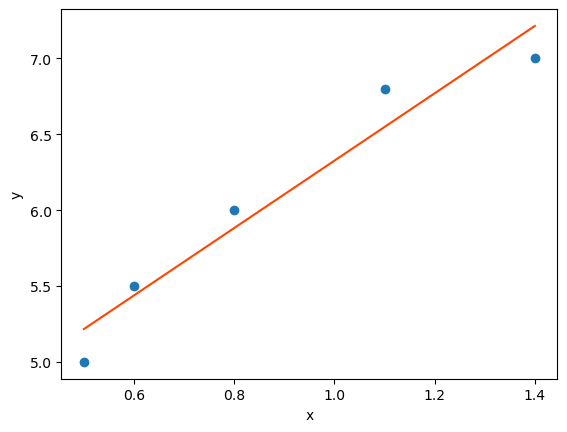

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4]).reshape(-1, 1)
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0]).reshape(-1, 1)

model = LinearRegression()
model.fit(xs, ys)

print(model.coef_, model.intercept_)
y_pred = model.predict(xs)

print("均方误差:", sm.mean_squared_error(ys, y_pred))
print("均值绝对值误差:", sm.mean_absolute_error(ys, y_pred))
print("中值绝对值误差:", sm.median_absolute_error(ys, y_pred))
print("R2得分 (0. 1]区间, 分数越高,误差越小.):", sm.r2_score(ys, y_pred))


plt.figure()
plt.scatter(xs, ys, label="data")
plt.plot(xs, model.predict(xs), c='orangered', label="prediction")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
### 模型的保存和加载
import pickle

with open("ml_03_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [12]:
with open("ml_03_model.pkl", "rb") as f:
    model = pickle.load(f)
    print(model.coef_, model.intercept_)
    print(model.predict(xs))

[[2.2189781]] [4.10729927]
[[5.21678832]
 [5.43868613]
 [5.88248175]
 [6.54817518]
 [7.21386861]]


## 回归模型中常用的评估指标 **R² 分数**（决定系数，Coefficient of Determination)

---

### R² 分数的定义
R² 分数衡量回归模型对数据的拟合程度，表示模型解释的因变量方差占总方差的比例。它的取值范围通常在 \(-\infty\) 到 1 之间：
- **R² = 1**：模型完美预测所有数据点。
- **R² = 0**：模型的预测能力等同于简单取均值（即没有解释任何方差）。
- **R² < 0**：模型比简单均值预测还差（可能是过拟合或模型不合适）。

---

### R² 分数的公式
R² 分数的数学公式如下：


$
 R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$


其中：
- $**\(\text{SS}_{\text{res}}\)**（残差平方和，Sum of Squared Residuals）：模型预测值与真实值之间的差的平方和。$
  $\[ \text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]$
  - $\(y_i\)：第 \(i\) 个样本的真实值。$
  - $\(\hat{y}_i\)：第 \(i\) 个样本的预测值。$
- **$\(\text{SS}_{\text{tot}}\)**（总平方和，Total Sum of Squares）：真实值与均值之间的差的平方和，表示数据的总方差。$
  $\[ \text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 \]$
  - $\(\bar{y}\)：真实值的均值。$


#### 直观理解
- \(\text{SS}_{\text{res}}\) 表示模型未解释的误差。
- \(\text{SS}_{\text{tot}}\) 表示数据的总变异性。
- \(R^2\) 是 1 减去未解释方差与总方差的比率，因此 \(R^2\) 越高，模型解释的方差越多。

---

### 特点
1. **范围**：
   - \(R^2 \leq 1\)，上限为 1。
   - 如果模型很差（例如预测值完全偏离真实值），\(R^2\) 可以为负数，因为 \(\text{SS}_{\text{res}}\) 可能大于 \(\text{SS}_{\text{tot}}\)。
2. **解释**：
   - \(R^2 = 0.8\) 表示模型解释了 80% 的数据方差。
   - \(R^2 = 0\) 表示模型没有比均值预测更好。
3. **局限性**：
   - \(R^2\) 不会告诉你模型是否过拟合。
   - 添加无关特征可能人为提高 \(R^2\)，因此需要结合调整后的 \(R^2\)（Adjusted R²）或交叉验证。

---

### 在 Python 中计算 R² 分数
使用 scikit-learn 的 `r2_score` 函数可以直接计算 R² 分数。以下是一个简单示例：

```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# 生成模拟回归数据集
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 预测
y_pred = model.predict(X)

# 计算 R² 分数
r2 = r2_score(y, y_pred)
print("R² 分数:", r2)

# 手动计算 R²（验证公式）
y_mean = y.mean()
ss_tot = sum((y - y_mean) ** 2)  # 总平方和
ss_res = sum((y - y_pred) ** 2)  # 残差平方和
r2_manual = 1 - (ss_res / ss_tot)
print("手动计算 R²:", r2_manual)
```

#### 输出示例
```
R² 分数: 0.925
手动计算 R²: 0.925
```
- \(R^2 = 0.925\) 表示模型解释了 92.5% 的数据方差，拟合效果很好。
- 手动计算结果与 `r2_score` 一致，验证了公式的正确性。

---

### 手动计算示例
假设有以下数据：
- 真实值 \(y = [2, 4, 5, 4, 5]\)
- 预测值 \(\hat{y} = [2.2, 3.8, 4.9, 4.1, 4.8]\)

1. **计算均值**：
   \[ \bar{y} = \frac{2 + 4 + 5 + 4 + 5}{5} = 4 \]

2. **计算 \(\text{SS}_{\text{tot}}\)**：
   \[ \text{SS}_{\text{tot}} = (2-4)^2 + (4-4)^2 + (5-4)^2 + (4-4)^2 + (5-4)^2 = 4 + 0 + 1 + 0 + 1 = 6 \]

3. **计算 \(\text{SS}_{\text{res}}\)**：
   \[ \text{SS}_{\text{res}} = (2-2.2)^2 + (4-3.8)^2 + (5-4.9)^2 + (4-4.1)^2 + (5-4.8)^2 \]
   \[ = 0.04 + 0.04 + 0.01 + 0.01 + 0.04 = 0.14 \]

4. **计算 R²**：
   \[ R^2 = 1 - \frac{0.14}{6} = 1 - 0.0233 = 0.9767 \]

- \(R^2 \approx 0.977\)，表示模型拟合非常好。

---

### 注意事项
1. **负值情况**：
   - 如果 \(\text{SS}_{\text{res}} > \text{SS}_{\text{tot}}\)（例如预测值偏离很大），\(R^2\) 会小于 0。
2. **与分类指标的区别**：
   - \(R^2\) 用于回归任务，而 F1、AUC、ROC 用于分类任务。
3. **局限性**：
   - \(R^2\) 不反映预测的绝对误差大小（可以用 MSE 或 MAE 补充）。

---

如果你有具体问题（比如想手动实现公式、解释某个 \(R^2\) 值，或结合特定数据集计算），请告诉我，我会进一步帮你解答！